In [29]:
!pip install scikit-learn
import sklearn
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
def exploratory_steps(x, y):
    df = pd.DataFrame(x)
    df.describe()
    df.info()
    sns.countplot(df)#, data = df)
    plt.show()
    sns.heatmap(df.corr(),
                square = True,
                annot = True,
                linewidths=0.1,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':8 })
    plt.show()
    df.hist(figsize = (11,11), color="#800080")
    df["y"] = y.values
    sns.pairplot(df, hue="y")
    plt.show()
#feature importance for out of box random forest

In [31]:
data = pd.read_csv("/content/winequality-red.csv", sep = ";")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


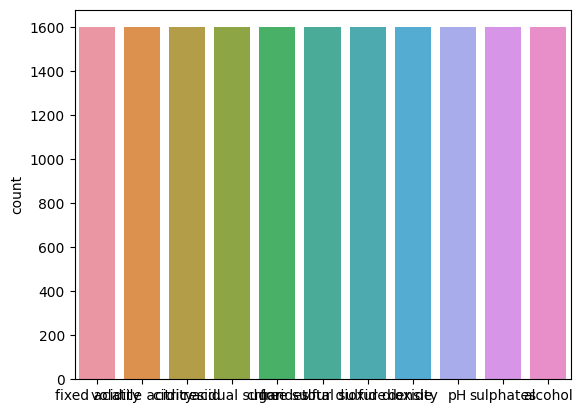

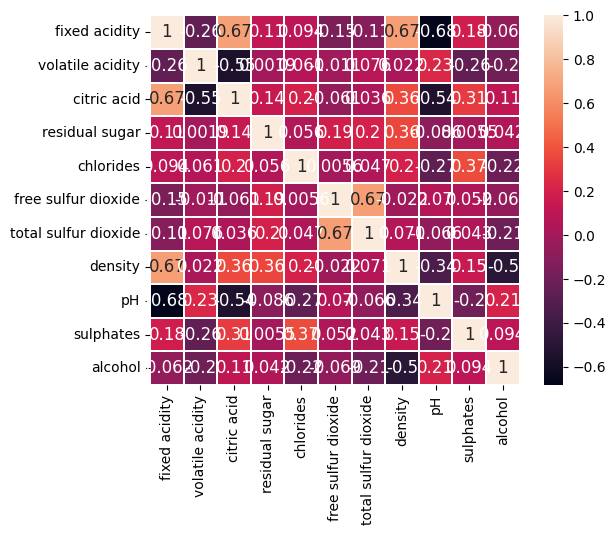

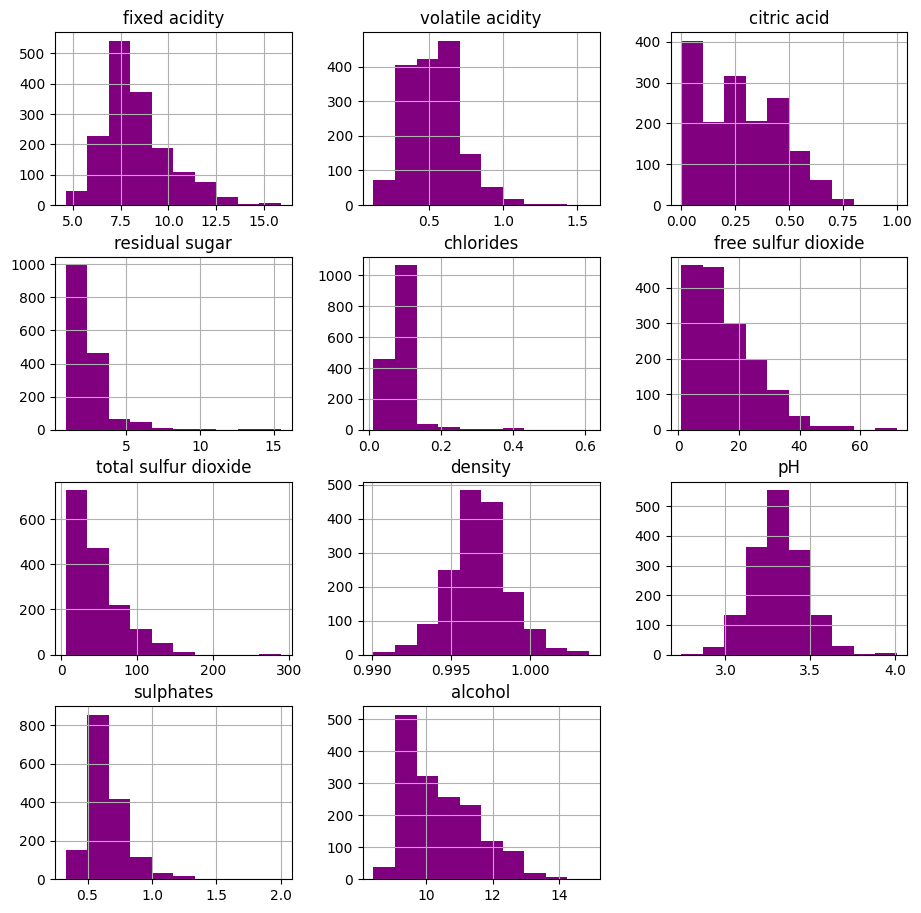

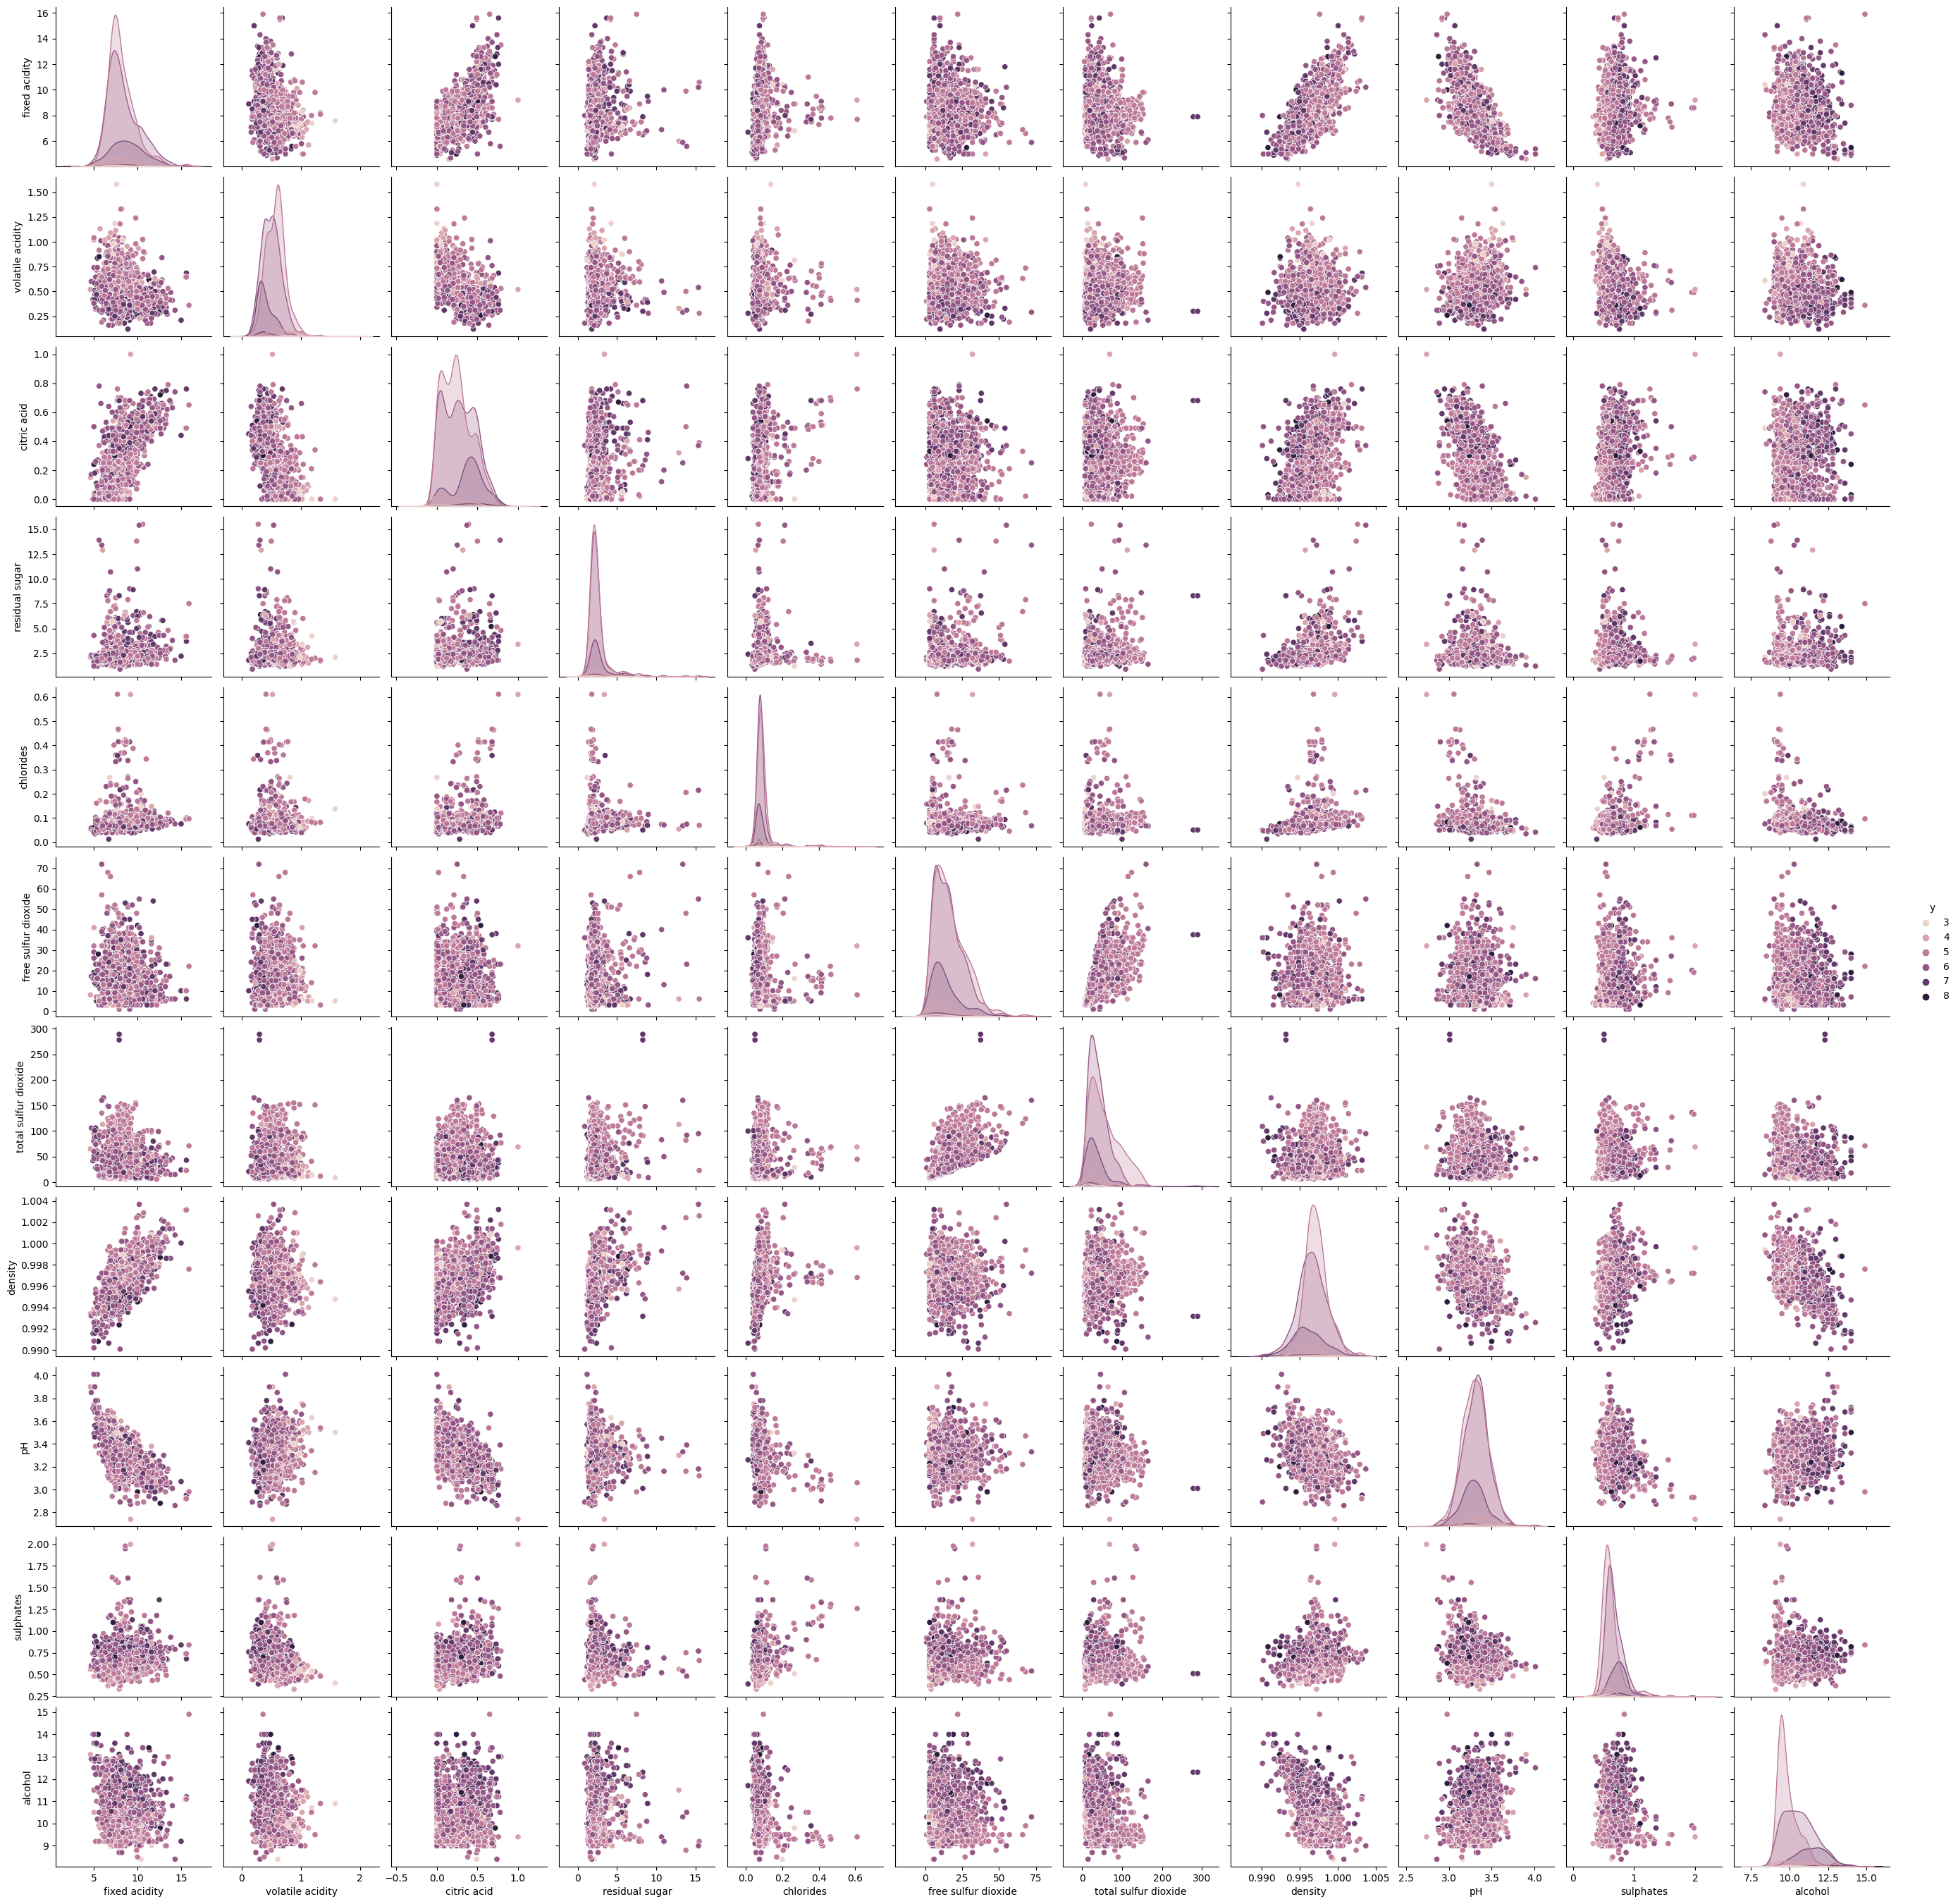

In [28]:
x = data.drop(columns = ['quality'])
#attemptd normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']
exploratory_steps(x, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1599 non-null   float64
 1   1       1599 non-null   float64
 2   2       1599 non-null   float64
 3   3       1599 non-null   float64
 4   4       1599 non-null   float64
 5   5       1599 non-null   float64
 6   6       1599 non-null   float64
 7   7       1599 non-null   float64
 8   8       1599 non-null   float64
 9   9       1599 non-null   float64
 10  10      1599 non-null   float64
 11  11      1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


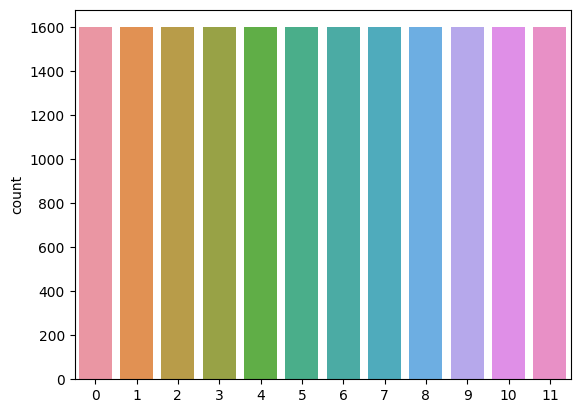

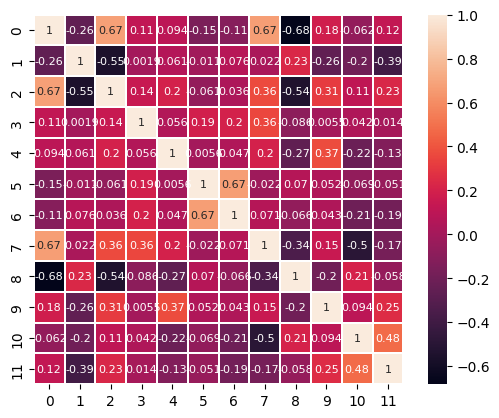

In [ ]:
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
exploratory_steps(x_mm, y)

In [ ]:
s_scaler = preprocessing.StandardScaler()
x_s = s_scaler.fit_transform(x)
exploratory_steps(x_s, y)

In [ ]:
q_transform = preprocessing.QuantileTransformer(random_state = 42)
x_q_t = q_transform.fit_transform(x)
exploratory_steps(x_q_t, y)

In [ ]:
x_norm = preprocessing.normalize(x, norm = "l2")
exploratory_steps(x_norm, y)

In [ ]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(X)